# Analyse des ordinateurs portables

 Ensemble de données sur les ordinateurs portables qui contient des informations sur divers aspects des ordinateurs portables tels que leur prix, leur remise, leurs spécifications et leur garantie. L’ensemble de données contient un total de 920 entrées, chacune représentant un seul ordinateur portable. Les données sont organisées en 10 colonnes, y compris « titre », « prix », « remise », « processeur », « RAM », « OS », « SSD », « Affichage », « In_build_sw » et « garantie ».



In [1]:
#Import les bonnes librairies qu’il nous faut (pandas, seaborn, matplotlib, numpy)
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import du dataset laptops.csv
df = pd.read_csv('laptops.csv')
print('dataset loaded')
df

dataset loaded


,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,"₹37,990","₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty
...,...,...,...,...,...,...,...,...,...,...,...
915,915,Lenovo Intel Core i7 12th Gen - (16 GB/512 GB ...,"₹1,19,990","₹1,53,89022% off",Intel Core i7 Processor (12th Gen),16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Touchscreen Display,NaN,3 Years Onsite Warranty + 3 Year Premium Care ...
916,916,DELL Core i5 11th Gen - (16 GB/512 GB SSD/Wind...,"₹68,990","₹95,99028% off",Processor: i5-11260H (Base: 2.60 GHz up to 4.4...,RAM & Storage: 16GB DDR4 (2 DIMM Slots) 512GB SSD,Graphics: NVIDIA GEFORCE RTX 3050 (4GB GDDR6) ...,"Display: 15.6"" FHD WVA AG 250 nits 120Hz Narro...",Ports: 1. HiSpeed USB 2.0 | 2. HiSpeed USB 2.0...,NaN,Intel Core i5 Processor (11th Gen)
917,917,DELL Inspiron Pentium Quad Core - (8 GB/256 GB...,"₹35,990","₹39,99010% off",Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty
918,918,ASUS Vivobook X515EA Core i3 11th Gen - (8 GB/...,"₹36,990","₹51,99028% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,"Office Home and Student 2019, MyASUS, Link to ...",1 Year Onsite Warranty


In [3]:
df.shape

(920, 11)

In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'price', 'discount', 'Processor', 'RAM', 'OS',
       'SSD', 'Display', 'In_build_sw', 'warranty'],
      dtype='object')

In [5]:
df["price"].str.contains("^\₹").value_counts()

True    920
Name: price, dtype: int64

In [6]:
# On supprime ₹ à l'aide d'une regex
df["price"] = df["price"].replace(regex=r"\₹", value="")

In [7]:
df["price"] = df["price"].replace(regex=r"\,", value="")

In [8]:
df.info() #un aperçu rapide de l’ensemble de données,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   920 non-null    int64 
 1   title        920 non-null    object
 2   price        920 non-null    object
 3   discount     831 non-null    object
 4   Processor    920 non-null    object
 5   RAM          920 non-null    object
 6   OS           920 non-null    object
 7   SSD          920 non-null    object
 8   Display      920 non-null    object
 9   In_build_sw  357 non-null    object
 10  warranty     906 non-null    object
dtypes: int64(1), object(10)
memory usage: 79.2+ KB


In [9]:
# On change le type de la colonne price en int
df["price"] = df["price"].astype(float)


In [10]:
df.dtypes

Unnamed: 0       int64
title           object
price          float64
discount        object
Processor       object
RAM             object
OS              object
SSD             object
Display         object
In_build_sw     object
warranty        object
dtype: object

In [11]:
df.describe()

,Unnamed: 0,price
count,920.000000,9.200000e+02
mean,459.500000,8.837219e+04
std,265.725422,6.915193e+04
min,0.000000,1.599000e+04
25%,229.750000,4.699000e+04
50%,459.500000,6.919100e+04
75%,689.250000,1.059900e+05
max,919.000000,1.174131e+06


In [12]:
# Le prix de laptop < 35000
df_filter = df[ df['price'] < 30000 ]
df_filter

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
11,11,HP Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/...,29990.0,"₹43,63131% off",AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 mm) Display,"Microsoft Office 2021 Home and Student, HP Doc...",1 Year Onsite Warranty
13,13,Lenovo Intel Celeron Dual Core - (8 GB/256 GB ...,27799.0,"₹40,49031% off",Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,NaN,2 Years Onsite�Warranty
14,14,acer Aspire 3 Ryzen 3 Dual Core 3250U - (8 GB/...,26990.0,"₹42,99937% off",AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,NaN,1 Year International Travelers Warranty (ITW)
17,17,Infinix INBook X1 Neo Series Celeron Quad Core...,20990.0,"₹29,99030% off",Intel Celeron Quad Core Processor,4 GB LPDDR4X RAM,64 bit Windows 11 Operating System,128 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
19,19,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,23990.0,"₹33,99029% off",Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
23,23,Lenovo Athlon Dual Core 3150U - (4 GB/1 TB HDD...,18990.0,"₹29,99936% off",AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,1 TB HDD,35.56 cm (14 Inch) Display,NaN,1 Year Onsite Warranty
28,28,HP Athlon Dual Core 3050U - (8 GB/256 GB SSD/W...,25990.0,"₹36,35928% off",AMD Athlon Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
50,50,HP G8 Ryzen 3 Dual Core AMD Ryzen 3 3250U - (8...,28490.0,"₹40,52829% off",AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
86,86,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,17990.0,"₹25,99030% off",Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,NaN,NaN
98,98,acer Aspire 3 Dual Core 3020e - (4 GB/256 GB S...,22990.0,"₹34,99934% off",AMD Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,"Acer Care Center, Quick Access, Acer Product R...",1 Year International Travelers Warranty (ITW)


In [13]:
df_filter.shape

(49, 11)

In [14]:
#sns.relplot(x='title', y='price', data=df_filter, kind='line')
#Splt.show()

In [15]:
#sns.relplot(x="title", y="price", data = df.sample(10), kind="line", height=8, aspect=3)
##problème de visibilité (trop de data) --> prendre un sous-échantillon df.sample()

In [16]:
# On supprime ₹ , % et off à l'aide d'une regex
df["discount"] = df["discount"].replace(regex=r"\₹", value="").replace(regex=r"\%", value="").replace(regex=r"off", value="")

df["discount"] = df["discount"].replace(regex=r"\,", value=".") #.astype(float)

In [17]:
df


,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,37990.0,58.48935,Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490.0,47.20624,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999.0,59.76043,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490.0,56.26019,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990.0,45.99026,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty
...,...,...,...,...,...,...,...,...,...,...,...
915,915,Lenovo Intel Core i7 12th Gen - (16 GB/512 GB ...,119990.0,1.53.89022,Intel Core i7 Processor (12th Gen),16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Touchscreen Display,NaN,3 Years Onsite Warranty + 3 Year Premium Care ...
916,916,DELL Core i5 11th Gen - (16 GB/512 GB SSD/Wind...,68990.0,95.99028,Processor: i5-11260H (Base: 2.60 GHz up to 4.4...,RAM & Storage: 16GB DDR4 (2 DIMM Slots) 512GB SSD,Graphics: NVIDIA GEFORCE RTX 3050 (4GB GDDR6) ...,"Display: 15.6"" FHD WVA AG 250 nits 120Hz Narro...",Ports: 1. HiSpeed USB 2.0 | 2. HiSpeed USB 2.0...,NaN,Intel Core i5 Processor (11th Gen)
917,917,DELL Inspiron Pentium Quad Core - (8 GB/256 GB...,35990.0,39.99010,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty
918,918,ASUS Vivobook X515EA Core i3 11th Gen - (8 GB/...,36990.0,51.99028,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,"Office Home and Student 2019, MyASUS, Link to ...",1 Year Onsite Warranty


In [18]:
df

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,37990.0,58.48935,Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490.0,47.20624,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999.0,59.76043,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490.0,56.26019,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990.0,45.99026,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty
...,...,...,...,...,...,...,...,...,...,...,...
915,915,Lenovo Intel Core i7 12th Gen - (16 GB/512 GB ...,119990.0,1.53.89022,Intel Core i7 Processor (12th Gen),16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Touchscreen Display,NaN,3 Years Onsite Warranty + 3 Year Premium Care ...
916,916,DELL Core i5 11th Gen - (16 GB/512 GB SSD/Wind...,68990.0,95.99028,Processor: i5-11260H (Base: 2.60 GHz up to 4.4...,RAM & Storage: 16GB DDR4 (2 DIMM Slots) 512GB SSD,Graphics: NVIDIA GEFORCE RTX 3050 (4GB GDDR6) ...,"Display: 15.6"" FHD WVA AG 250 nits 120Hz Narro...",Ports: 1. HiSpeed USB 2.0 | 2. HiSpeed USB 2.0...,NaN,Intel Core i5 Processor (11th Gen)
917,917,DELL Inspiron Pentium Quad Core - (8 GB/256 GB...,35990.0,39.99010,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty
918,918,ASUS Vivobook X515EA Core i3 11th Gen - (8 GB/...,36990.0,51.99028,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,"Office Home and Student 2019, MyASUS, Link to ...",1 Year Onsite Warranty


In [19]:
#ajouter une colonne brand
df['brand'] = df['title'].str.split(' ').str[0]
df.brand.value_counts() #Renvoyer une série contenant le nombre de lignes uniques dans le Df.

ASUS         263
HP           165
DELL         162
Lenovo       108
acer          62
MSI           50
APPLE         44
Infinix       31
SAMSUNG        8
GIGABYTE       7
realme         4
ALIENWARE      4
Avita          4
RedmiBook      2
LG             2
Nokia          1
Vaio           1
Mi             1
Ultimus        1
Name: brand, dtype: int64

In [20]:
df

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,brand
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,37990.0,58.48935,Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM,DELL
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490.0,47.20624,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999.0,59.76043,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490.0,56.26019,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990.0,45.99026,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS
...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,Lenovo Intel Core i7 12th Gen - (16 GB/512 GB ...,119990.0,1.53.89022,Intel Core i7 Processor (12th Gen),16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Touchscreen Display,NaN,3 Years Onsite Warranty + 3 Year Premium Care ...,Lenovo
916,916,DELL Core i5 11th Gen - (16 GB/512 GB SSD/Wind...,68990.0,95.99028,Processor: i5-11260H (Base: 2.60 GHz up to 4.4...,RAM & Storage: 16GB DDR4 (2 DIMM Slots) 512GB SSD,Graphics: NVIDIA GEFORCE RTX 3050 (4GB GDDR6) ...,"Display: 15.6"" FHD WVA AG 250 nits 120Hz Narro...",Ports: 1. HiSpeed USB 2.0 | 2. HiSpeed USB 2.0...,NaN,Intel Core i5 Processor (11th Gen),DELL
917,917,DELL Inspiron Pentium Quad Core - (8 GB/256 GB...,35990.0,39.99010,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,DELL
918,918,ASUS Vivobook X515EA Core i3 11th Gen - (8 GB/...,36990.0,51.99028,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,"Office Home and Student 2019, MyASUS, Link to ...",1 Year Onsite Warranty,ASUS


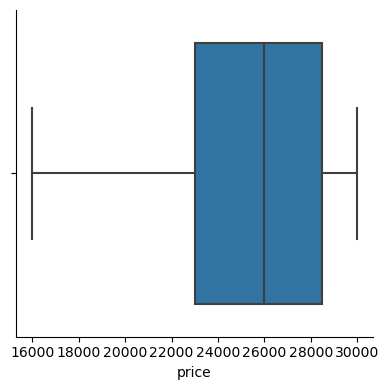

In [21]:
sns.catplot(x="price", data = df_filter, kind= "box", height=4)

In [23]:
df['item_price'] = df['price']*[(1-df['discount'])/100]

TypeError: unsupported operand type(s) for -: 'int' and 'str'

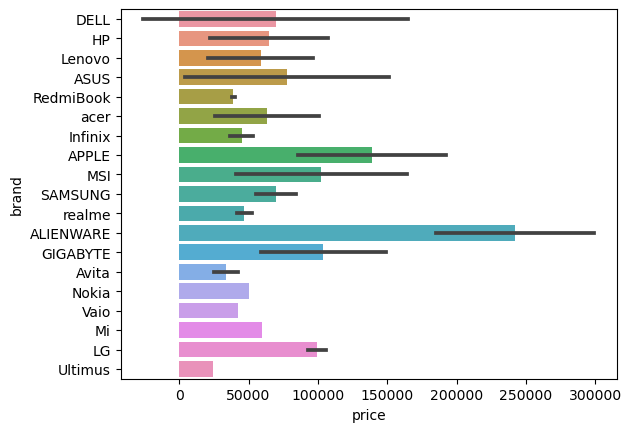

In [31]:
sns.barplot(x='price', y="brand", data = df ,ci='sd', estimator=np.median) 
plt.show()